# Properties of Rectangular Waveguide

## Introduction

This example demonstrates how to use [scikit-rf](http://www.scikit-rf.org) to calculate some properties of rectangular waveguide. For more information regarding the theoretical basis for these calculations, see the [References](#References).

## Object Creation

This first section imports neccesary modules and creates several [RectangularWaveguide](http://scikit-rf.org/doc/dev/reference/media/generated/skrf.media.rectangularWaveguide.RectangularWaveguide.html) objects for some standard waveguide bands. 

In [1]:
# imports 
import skrf as rf 
from scipy.constants import mil,c
from skrf.media import RectangularWaveguide, Freespace
from skrf.frequency import Frequency
from pylab import * 
import matplotlib as mpl

# plot formating
mpl.rcParams['lines.linewidth'] = 2

# create frequency objects for standard bands
f_wr5p1  = Frequency(140,220,1001, 'ghz')
f_wr3p4  = Frequency(220,330,1001, 'ghz')
f_wr2p2 = Frequency(330,500,1001, 'ghz')
f_wr1p5 = Frequency(500,750,1001, 'ghz')
f_wr1   = Frequency(750,1100,1001, 'ghz')

# create rectangular waveguide objects 
wr5p1 = RectangularWaveguide(f_wr5p1.copy(), a=51*mil, b=25.5*mil, rho = 'au')
wr3p4 = RectangularWaveguide(f_wr3p4.copy(), a=34*mil, b=17*mil, rho = 'au')
wr2p2 = RectangularWaveguide(f_wr2p2.copy(), a=22*mil, b=11*mil, rho = 'au')
wr1p5 = RectangularWaveguide(f_wr1p5.copy(), a=15*mil, b=7.5*mil, rho = 'au')
wr1   = RectangularWaveguide(f_wr1.copy(), a=10*mil, b=5*mil, rho = 'au')

# add names to waveguide objects for use in plot legends
wr5p1.name = 'WR-5.1'
wr3p4.name = 'WR-3.4'
wr2p2.name = 'WR-2.2'
wr1p5.name = 'WR-1.5'
wr1.name = 'WR-1.0'

# create a list to iterate through
wg_list = [wr5p1, wr3p4,wr2p2,wr1p5,wr1]

# creat a freespace object too
freespace = Freespace(Frequency(125,1100, 1001))
freespace.name = 'Free Space'

## Conductor Loss

(100, 1300)

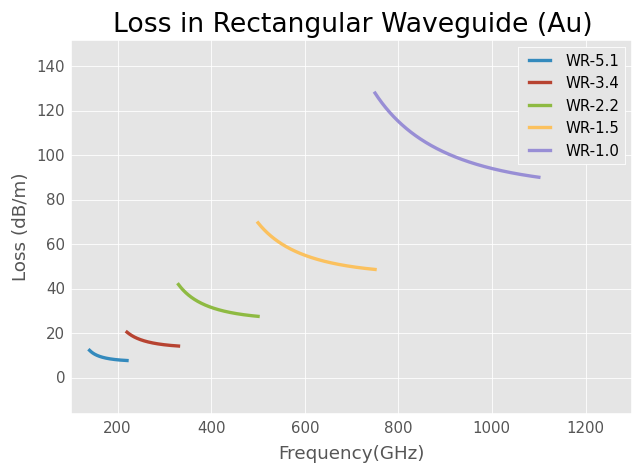

In [2]:
for wg in wg_list:
    wg.frequency.plot(rf.np_2_db(wg.alpha), label=wg.name )

legend()    
xlabel('Frequency(GHz)')
ylabel('Loss (dB/m)')
title('Loss in Rectangular Waveguide (Au)');
xlim(100,1300)

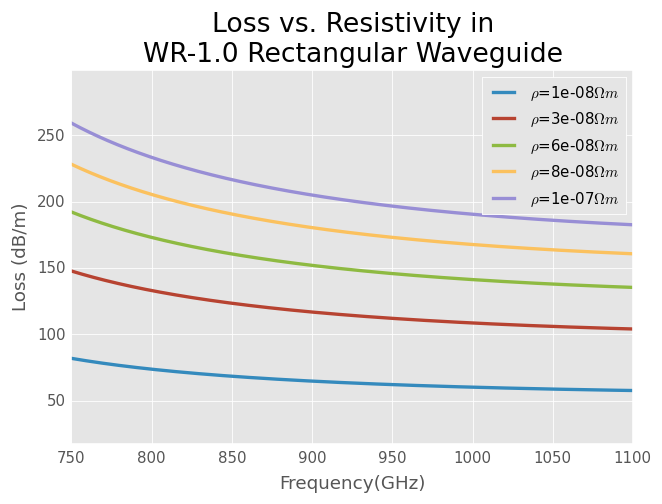

In [3]:
resistivity_list = linspace(1,10,5)*1e-8 # ohm meter 
for rho in resistivity_list:
    wg = RectangularWaveguide(f_wr1.copy(), a=10*mil, b=5*mil, 
                              rho = rho)
    wg.frequency.plot(rf.np_2_db(wg.alpha),label=r'$ \rho $=%.e$ \Omega m$'%rho )

legend()    
#ylim(.0,20)
xlabel('Frequency(GHz)')
ylabel('Loss (dB/m)')
title('Loss vs. Resistivity in\nWR-1.0 Rectangular Waveguide');

## Phase Velocity

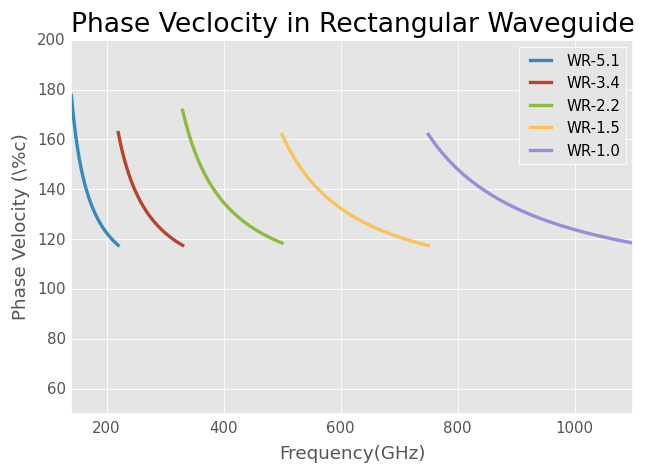

In [4]:
for wg in wg_list:
    wg.frequency.plot(100*wg.v_p.real/c, label=wg.name )

legend()    
ylim(50,200)
xlabel('Frequency(GHz)')
ylabel('Phase Velocity (\%c)')
title('Phase Veclocity in Rectangular Waveguide');

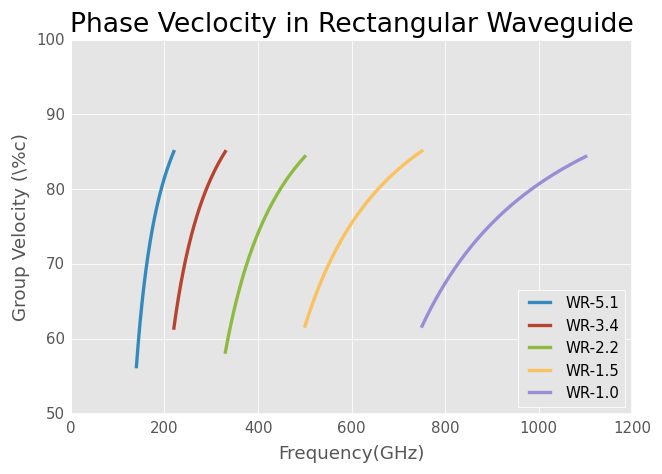

In [5]:
for wg in wg_list:
    plt.plot(wg.frequency.f_scaled[1:], 
             100/c*diff(wg.frequency.w)/diff(wg.beta), 
             label=wg.name )
    
legend()    
ylim(50,100)
xlabel('Frequency(GHz)')
ylabel('Group Velocity (\%c)')
title('Phase Veclocity in Rectangular Waveguide');

## Propagation Constant

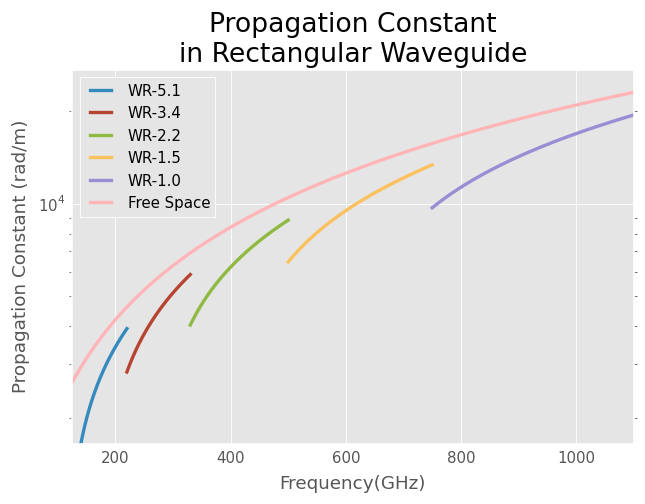

In [6]:
for wg in wg_list+[freespace]:
    wg.frequency.plot(wg.beta,   label=wg.name )
    
legend()    
xlabel('Frequency(GHz)')
ylabel('Propagation Constant (rad/m)')
title('Propagation Constant \nin Rectangular Waveguide');
semilogy();

## References


* [1] http://www.microwaves101.com/encyclopedia/waveguidemath.cfm
* [2] http://en.wikipedia.org/wiki/Waveguide_(electromagnetism)
* [3] R. F. Harrington, Time-Harmonic Electromagnetic Fields (IEEE Press Series on Electromagnetic Wave Theory). Wiley-IEEE Press, 2001.
* [4] http://www.ece.rutgers.edu/~orfanidi/ewa (see Chapter 9)
